
[INFO] Data Summary:
                           timestamp       ammonia      humidity  \
count                          75560  7.556000e+04  75560.000000   
mean   2024-04-12 16:23:13.940709632  3.011624e+09     58.966902   
min              2024-03-01 00:00:00  0.000000e+00     36.700000   
25%              2024-03-14 04:45:45  0.000000e+00     55.300000   
50%              2024-04-14 10:37:30  0.000000e+00     59.700000   
75%              2024-04-29 02:50:15  0.000000e+00     63.300000   
max              2024-06-17 23:21:00  1.370000e+13     91.700000   
std                              NaN  1.994865e+11      5.862534   

        temperature           iaq          hour  daily_visitor  
count  75560.000000  75560.000000  75560.000000   75560.000000  
mean      35.940617     56.922444     11.461038   18482.499166  
min       29.000000      0.000000      0.000000     133.000000  
25%       34.600000     25.000000      5.000000    7442.000000  
50%       35.800000     25.000000     11

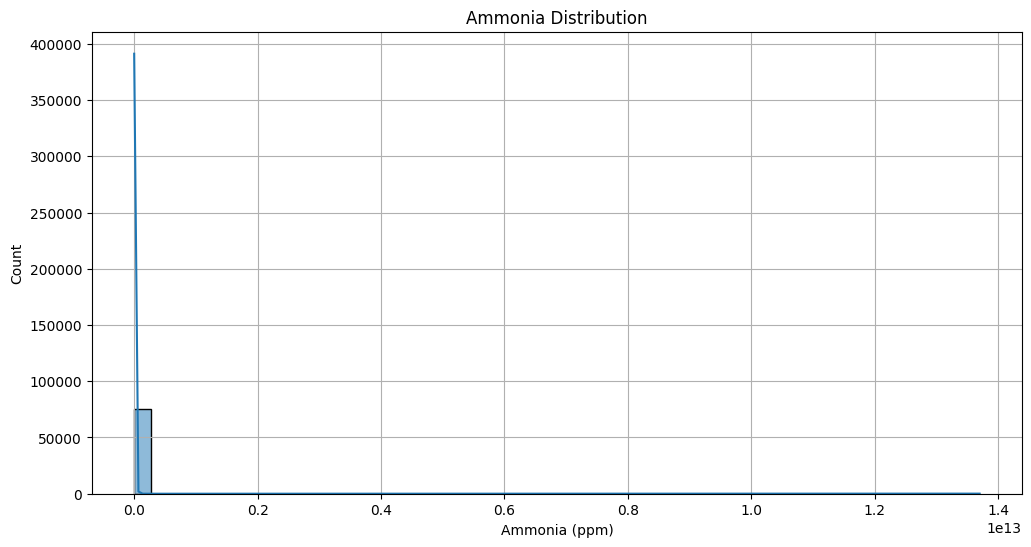

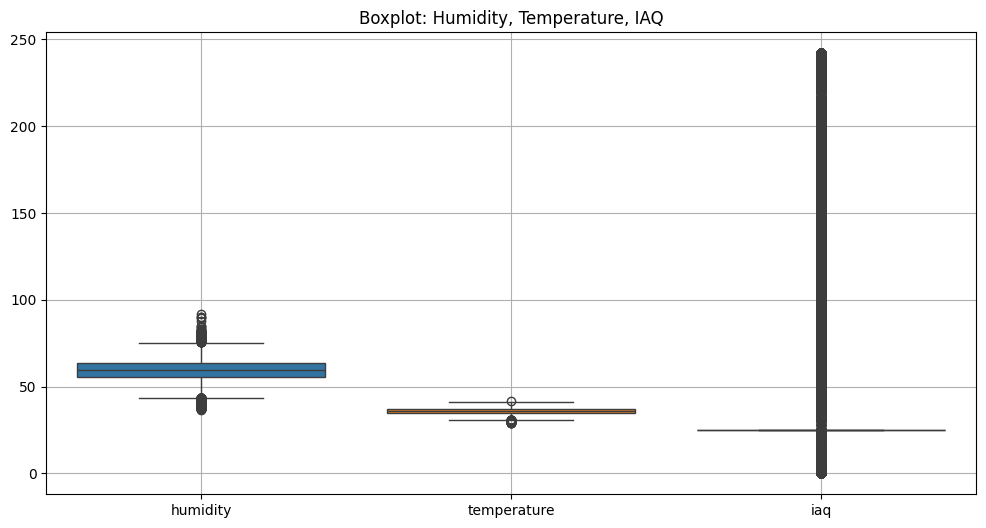

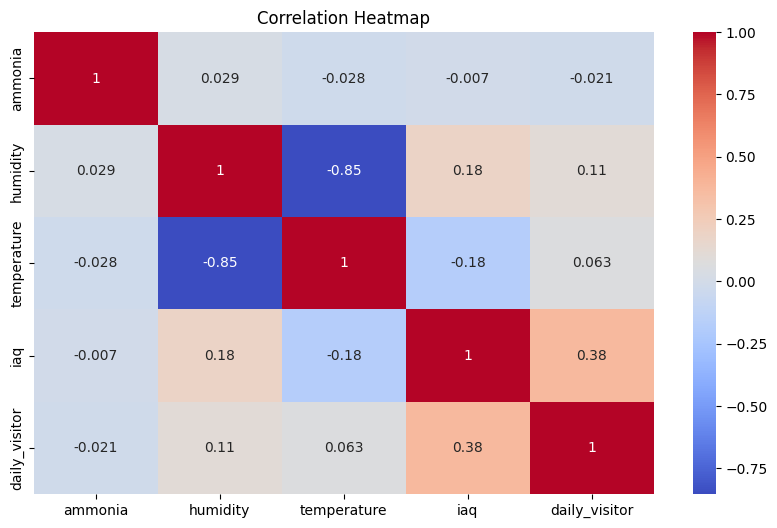


✅ Cleaned data saved as 'cleaned_data_for_ml.csv'


In [8]:
# ===================================================
# FILE A: Data Preprocessing + Feature Engineering + EDA for ML Toilet v2
# ===================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("data_v1_15june.xlsx")

# Convert 'timestamp' column to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# -----------------------------
# Part 1: Preprocessing
# -----------------------------

# Drop rows with missing sensor values and explicitly create a copy
df_clean = df.dropna(subset=["ammonia", "humidity", "temperature", "iaq"]).copy()

# Fill missing visitor values using forward/backward fill
df_clean["visitor"] = df_clean["visitor"].ffill().bfill()

# Extract time features
df_clean["day"] = df_clean["timestamp"].dt.day_name()
df_clean["hour"] = df_clean["timestamp"].dt.hour

# Convert visitor to daily only (max value per day)
daily_visitors = df_clean.groupby(df_clean["timestamp"].dt.date)["visitor"].transform("max")
df_clean["daily_visitor"] = daily_visitors

# Drop original visitor column
df_clean = df_clean.drop(columns=["visitor"])

# -----------------------------
# Part 2: Exploratory Data Analysis (EDA)
# -----------------------------

# Summary statistics
print("\n[INFO] Data Summary:")
print(df_clean.describe())

# Missing value check
print("\n[INFO] Missing Values:")
print(df_clean.isnull().sum())

# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(df_clean["ammonia"], kde=True, bins=50)
plt.title("Ammonia Distribution")
plt.xlabel("Ammonia (ppm)")
plt.ylabel("Count")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean[["humidity", "temperature", "iaq"]])
plt.title("Boxplot: Humidity, Temperature, IAQ")
plt.grid(True)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[["ammonia", "humidity", "temperature", "iaq", "daily_visitor"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Save preprocessed dataset
df_clean.to_csv("cleaned_data_for_ml.csv", index=False)
print("\n✅ Cleaned data saved as 'cleaned_data_for_ml.csv'")

C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.9967 - loss: 0.0317 - val_accuracy: 0.9999 - val_loss: 0.0028
Epoch 2/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 50s 56ms/step - accuracy: 1.0000 - loss: 1.4815e-05 - val_accuracy: 0.9999 - val_loss: 0.0031
Epoch 3/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 50s 55ms/step - accuracy: 1.0000 - loss: 4.0544e-06 - val_accuracy: 0.9999 - val_loss: 0.0034
Epoch 4/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 52s 58ms/step - accuracy: 1.0000 - loss: 2.1739e-06 - val_accuracy: 0.9999 - val_loss: 0.0035
Epoch 5/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 51s 57ms/step - accuracy: 1.0000 - loss: 1.9791e-06 - val_accuracy: 0.9999 - val_loss: 0.0037
Epoch 6/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 1.0000 - loss: 3.4685e-07 - val_accuracy: 0.9999 - val_loss: 0.0039
Epoch 7/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 1.0000 - loss: 2.0174e-07 - val_accuracy: 0.9999 - val_loss: 0.0040
Epoch 8/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 

C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

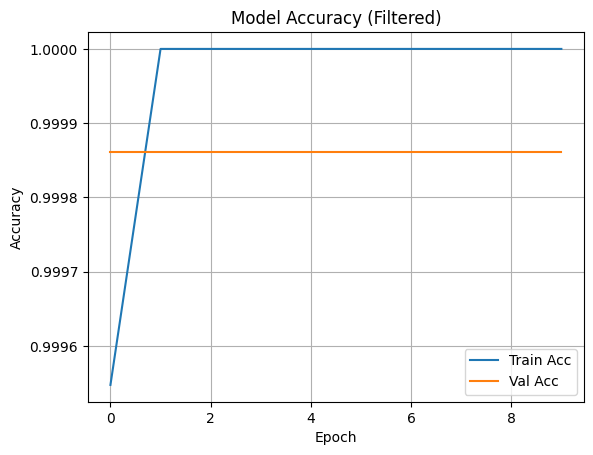

Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%

✅ Model saved as cnn_lstm_filtered_model.h5


In [9]:

# ===================================================
# FILE B1: CNN-LSTM Model using Filtered Ammonia Dataset
# ===================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load filtered dataset (ammonia ≤ 50 ppm)
df = pd.read_csv("cleaned_filtered_ammonia.csv")

# Generate cleanliness labels
def classify_cleanliness(row):
    if row['ammonia'] <= 0.5 and row['iaq'] >= 30000:
        return "Clean"
    elif row['ammonia'] <= 1.5:
        return "Normal"
    elif row['ammonia'] <= 4.0 or row['iaq'] < 5000:
        return "Dirty"
    else:
        return "Very Dirty"

df['cleanliness_level'] = df.apply(classify_cleanliness, axis=1)

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['cleanliness_level'])
label_names = label_encoder.classes_

# Scale features
features = ['ammonia', 'humidity', 'temperature', 'iaq', 'hour', 'daily_visitor']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

# Create sequences for CNN-LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(df['label'].iloc[i])
X, y = np.array(X), np.array(y)
y_cat = to_categorical(y)

# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X, y_cat, epochs=10, batch_size=64, validation_split=0.2)

# Predict and evaluate
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=label_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy (Filtered)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Sample prediction confidence
for i in range(5):
    print(f"Prediction: {label_names[y_pred[i]]}, Confidence: {np.max(y_pred_prob[i]) * 100:.2f}%")

# Save model
model.save("cnn_lstm_filtered_model.h5")
print("\n✅ Model saved as cnn_lstm_filtered_model.h5")


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


899/899 ━━━━━━━━━━━━━━━━━━━━ 63s 62ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 54s 60ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 57s 64ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 55s 61ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
899/899 ━━━━━━━━━━━━━━━━━━━━ 55s 6

C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2246/2246 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     71849

    accuracy                           1.00     71849
   macro avg       1.00      1.00      1.00     71849
weighted avg       1.00      1.00      1.00     71849


Confusion Matrix:
[[71849]]


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


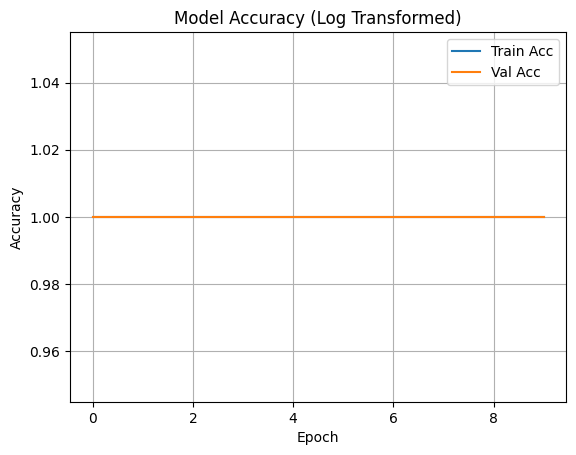

Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%

✅ Model saved as cnn_lstm_log_model.h5


In [10]:

# ===================================================
# FILE B1: CNN-LSTM Model using Filtered Ammonia Dataset
# ===================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load filtered dataset (ammonia ≤ 50 ppm)
df = pd.read_csv("cleaned_log_ammonia.csv")

# Generate cleanliness labels
def classify_cleanliness(row):
    if row['ammonia'] <= 0.5 and row['iaq'] >= 30000:
        return "Clean"
    elif row['ammonia'] <= 1.5:
        return "Normal"
    elif row['ammonia'] <= 4.0 or row['iaq'] < 5000:
        return "Dirty"
    else:
        return "Very Dirty"

df['cleanliness_level'] = df.apply(classify_cleanliness, axis=1)

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['cleanliness_level'])
label_names = label_encoder.classes_

# Scale features
features = ['ammonia', 'humidity', 'temperature', 'iaq', 'hour', 'daily_visitor']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

# Create sequences for CNN-LSTM
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(df['label'].iloc[i])
X, y = np.array(X), np.array(y)
y_cat = to_categorical(y)

# Build CNN-LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X, y_cat, epochs=10, batch_size=64, validation_split=0.2)

# Predict and evaluate
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=label_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy (Log Transformed)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Sample prediction confidence
for i in range(5):
    print(f"Prediction: {label_names[y_pred[i]]}, Confidence: {np.max(y_pred_prob[i]) * 100:.2f}%")

# Save model
model.save("cnn_lstm_log_model.h5")
print("\n✅ Model saved as cnn_lstm_log_model.h5")


C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 61s 59ms/step - accuracy: 0.9984 - loss: 0.0281 - val_accuracy: 0.7581 - val_loss: 4.0506
Epoch 2/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 1.0000 - loss: 5.7639e-06 - val_accuracy: 0.7581 - val_loss: 4.5847
Epoch 3/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 1.0000 - loss: 2.7864e-06 - val_accuracy: 0.7581 - val_loss: 5.0051
Epoch 4/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 1.0000 - loss: 2.3892e-06 - val_accuracy: 0.7581 - val_loss: 5.3749
Epoch 5/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 1.0000 - loss: 2.2402e-06 - val_accuracy: 0.7581 - val_loss: 5.8762
Epoch 6/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 1.0000 - loss: 4.2360e-07 - val_accuracy: 0.7581 - val_loss: 6.0610
Epoch 7/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 62s 66ms/step - accuracy: 1.0000 - loss: 2.4967e-07 - val_accuracy: 0.7581 - val_loss: 6.2821
Epoch 8/10
944/944 ━━━━━━━━━━━━━━━━━━━━ 58s 61ms/step - accuracy: 

C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\atinh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

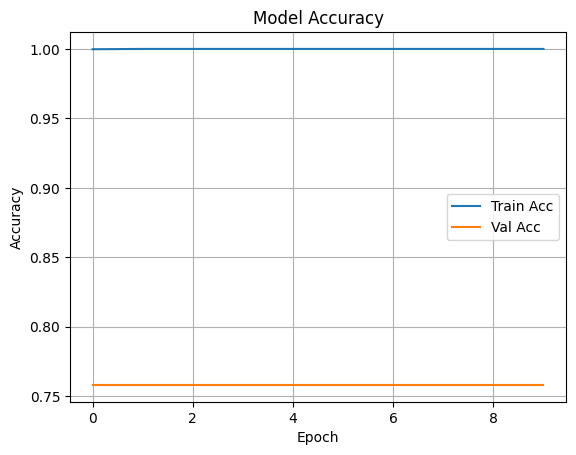

Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%
Prediction: Normal, Confidence: 100.00%

✅ Model saved as cnn_lstm_cleanliness_model.h5


In [11]:

# ===================================================
# FILE B: Label Creation + CNN-LSTM Model for Toilet Cleanliness Classification
# ===================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# -----------------------------
# Load cleaned data
# -----------------------------
df = pd.read_csv("cleaned_data_for_ml.csv")

# -----------------------------
# Generate Cleanliness Labels
# -----------------------------
def classify_cleanliness(row):
    if row['ammonia'] <= 0.5 and row['iaq'] >= 30000:
        return "Clean"
    elif row['ammonia'] <= 1.5:
        return "Normal"
    elif row['ammonia'] <= 4.0 or row['iaq'] < 5000:
        return "Dirty"
    else:
        return "Very Dirty"

df['cleanliness_level'] = df.apply(classify_cleanliness, axis=1)

# -----------------------------
# Encode Labels
# -----------------------------
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['cleanliness_level'])
label_names = label_encoder.classes_

# -----------------------------
# Feature Scaling
# -----------------------------
features = ['ammonia', 'humidity', 'temperature', 'iaq', 'hour', 'daily_visitor']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])

# -----------------------------
# Create Sequences for CNN-LSTM
# -----------------------------
sequence_length = 60  # 60-min window
X, y = [], []
for i in range(sequence_length, len(scaled_features)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(df['label'].iloc[i])
X, y = np.array(X), np.array(y)

# One-hot encode labels
y_cat = to_categorical(y)

# -----------------------------
# Build CNN-LSTM Model
# -----------------------------
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(LSTM(units=64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(y_cat.shape[1], activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -----------------------------
# Train Model
# -----------------------------
history = model.fit(X, y_cat, epochs=10, batch_size=64, validation_split=0.2)

# -----------------------------
# Evaluate and Predict
# -----------------------------
y_pred_prob = model.predict(X)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=label_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred))

# -----------------------------
# Plot Accuracy
# -----------------------------
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# Sample Prediction Confidence
# -----------------------------
for i in range(5):
    print(f"Prediction: {label_names[y_pred[i]]}, Confidence: {np.max(y_pred_prob[i]) * 100:.2f}%")

# -----------------------------
# Save Model
# -----------------------------
model.save("cnn_lstm_cleanliness_model.h5")
print("\n✅ Model saved as cnn_lstm_cleanliness_model.h5")


In [13]:
# data biasing on normal 0 ammonia
# the data was have overfitting 